# COMP 3400 Project 1

Keenan Nicholson 201632668

Kunal Sikka 202028189

## The Dataset

The following dataset (https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) captures the details of how CO2 emissions by a vehicle can vary with the different features (i.e., engine size, four-wheel drive or two-wheel drive, fuel type, transmission type). The dataset has been taken from Canada Government official open data website and contains data over a period of 7 years. There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features which are detailed below.

Understanding the Data:
* **Model:** 
    - 4WD/4X4 = Four-wheel drive
    - AWD = All-wheel drive
    - FFV = Flexible-fuel vehicle
    - SWB = Short wheelbase
    - LWB = Long wheelbase
    - EWB = Extended wheelbase
* **Transmission:** 
    - A = automatic = automated manual
    - AS = automatic with select shift
    - AV = continuously variable
    - M = manual, 3 - 10 = Number of gears
* **Fuel type:** 
    - X = regular gasoline
    - Z = premium gasoline
    - D = diesel
    - E = ethanol (E85)
    - N = natural gas
* **Fuel consumption:**
    - City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
* **CO2 emissions:** 
    - the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving



In this project we will be analyzing fuel efficiency and CO2 emissions of vehicles investigate how features such as transmission type, fuel type and engine size effect a vehicles efficiency. Additionally, we wish to predict the fuel efficiency and emisions of a vehicle based on several given attributes. Listed below are the variables we will be using in our investigation and why we have chosen to use these variables.


    
In this dataset we will be analysing with respect to the following 12 variables:
* **Make:** The manufacturer brand of the vehicle which will allow for a comparison efficiency and emissions between manufacturers.
* **Model:** The specific vehicle model which allows us to analyze how different features can effect the fuel efficiency and CO2 emissions output of the same make and model of car (i.e., manual transmission versus automatic transmission in honda civics).
* **Vehicle Class:** The vehicle size class (compact, SUV, mid-size etc) can be used as a direct comparison between classes or to see which make creates the most fuel efficient and environmentally friendly vehicle by class.
* **Engine Size(L):** The volume of the engine in litres - a feature which can be used to compare the fuel efficiency and CO2 emissions of a vehicle with respect to a change in engine size. This comparison can be simply pitting engine sizes, or engine sizes with respect to other variables such as make or model against each other.
* **Cylinders:** The number of engine cylinders - a feature which can be used to analyze how a change in the number of cylinders effects vehicle efficiency and CO2 emissions. Similar to engine size we may wish to refine our analysis and examine the difference the number of cylinders has on the same make and model of car.
* **Transmission:** The type of transmission in the vehicle a feature which can be used to compare the fuel efficiency and CO2 emissions of a vehicle with respect to a change in transmission. Again, we can produce a more meaningful analysis of the dataset by comparing by model and make as well as independently.
* **Fuel Type:** Type of fuel used to power vehicle may be used in an independent analysis to see which fuel type has the greatest effiency, or which make produces the most fuel effient or environmentally friendyly vehicles by fuel type. 
* **Fuel Consumption City(L/100 km):** The fuel consumption of the vehicle measured in litres per 100 kilometers while driving in a city environment will be used in the calculations and comparison of fuel efficiency.
* **Fuel Consumption Hwy(L/100 km):** The fuel consumption of the vehicle measured in litres per 100 kilometers while driving on the highway will be used in the calculations and comparison of fuel efficiency.
* **Fuel Consumption Comb(L/100 km):** The fuel consumption of the vehicle measured in litres per 100 kilometers while used for both city and highway driving will be used in the calculations and comparison of fuel efficiency.
* **Fuel Consumption COMP(mpg):** The fuel consumption of the vehicle measured in miles per gallon while used for both city and highway driving will be used in the calculations and comparison of fuel efficiency.
* **CO2 Emissions(g/km):** The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving will be used in the calculation and comparisons of the vehicles CO2 emissions.


In [55]:
import pandas as pd
import numpy as np
import random as r
import matplotlib.pyplot as plt

df = pd.read_csv("CO2 Emissions_Canada.csv").sort_index() # Reading the csv into a pandas dataframe and sorting by make

display(df)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


## Setup and Initial Analysis

To begin our analysis we will check for anomalies in the dataset. To do this we will generate some summary statistics using df.describe() on fuel efficiency and CO2 emissions columns as well as visualizing the data with a couple box plots and scatter plot. (**Note:** we do not generate descriptive details for Make. Model. Vehicle Class. Engine Size, Cylinders, Transmission or Fuel Type as these are set features and not variables. Please refer to the variable descriptions above for a more in depth understanding of these attributes)

In [56]:
statistics = df.describe()[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']] # generating some basic statistics about the dataset using pandas dataframe describe method
display(statistics)

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,12.556534,9.041706,10.975071,250.584699
std,3.500274,2.224456,2.892506,58.512679
min,4.200000,4.000000,4.100000,96.000000
25%,10.100000,7.500000,8.900000,208.000000
50%,12.100000,8.700000,10.600000,246.000000
75%,14.600000,10.200000,12.600000,288.000000
max,30.600000,20.600000,26.100000,522.000000


As we can see, there doesnt seem to be any immediate cause for concern as nothing in the statistical analysis jumps out; the means are about the halfway point between minimum and maximums for each variable and the standard deviations are reasonable.

We want to spot any outliers in these 3 specific columns as any inaccurate data here may interfer with accuracy when comparing vehicle features, or when using these features to predict fuel efficiency and emissions (we have chosen to use combined fuel consumption and omit city and highway *for now* as if there is an outlier in city or highway, it will most likely show up in combined. Additionally, our focus will primarily be on combined fuel efficiency (L/100) ). To make these anomalies easier to see we can visualize this data by producing a few graphs, the first two are box plots of combined fuel efficiency and CO2 emissions attributes, the third will be a scatter plot to see if the combined city/highway fuel consumption has any effect on CO2 emissions.

<AxesSubplot:xlabel='[Fuel Consumption Comb (L/100 km)]', ylabel='[CO2 Emissions(g/km)]'>

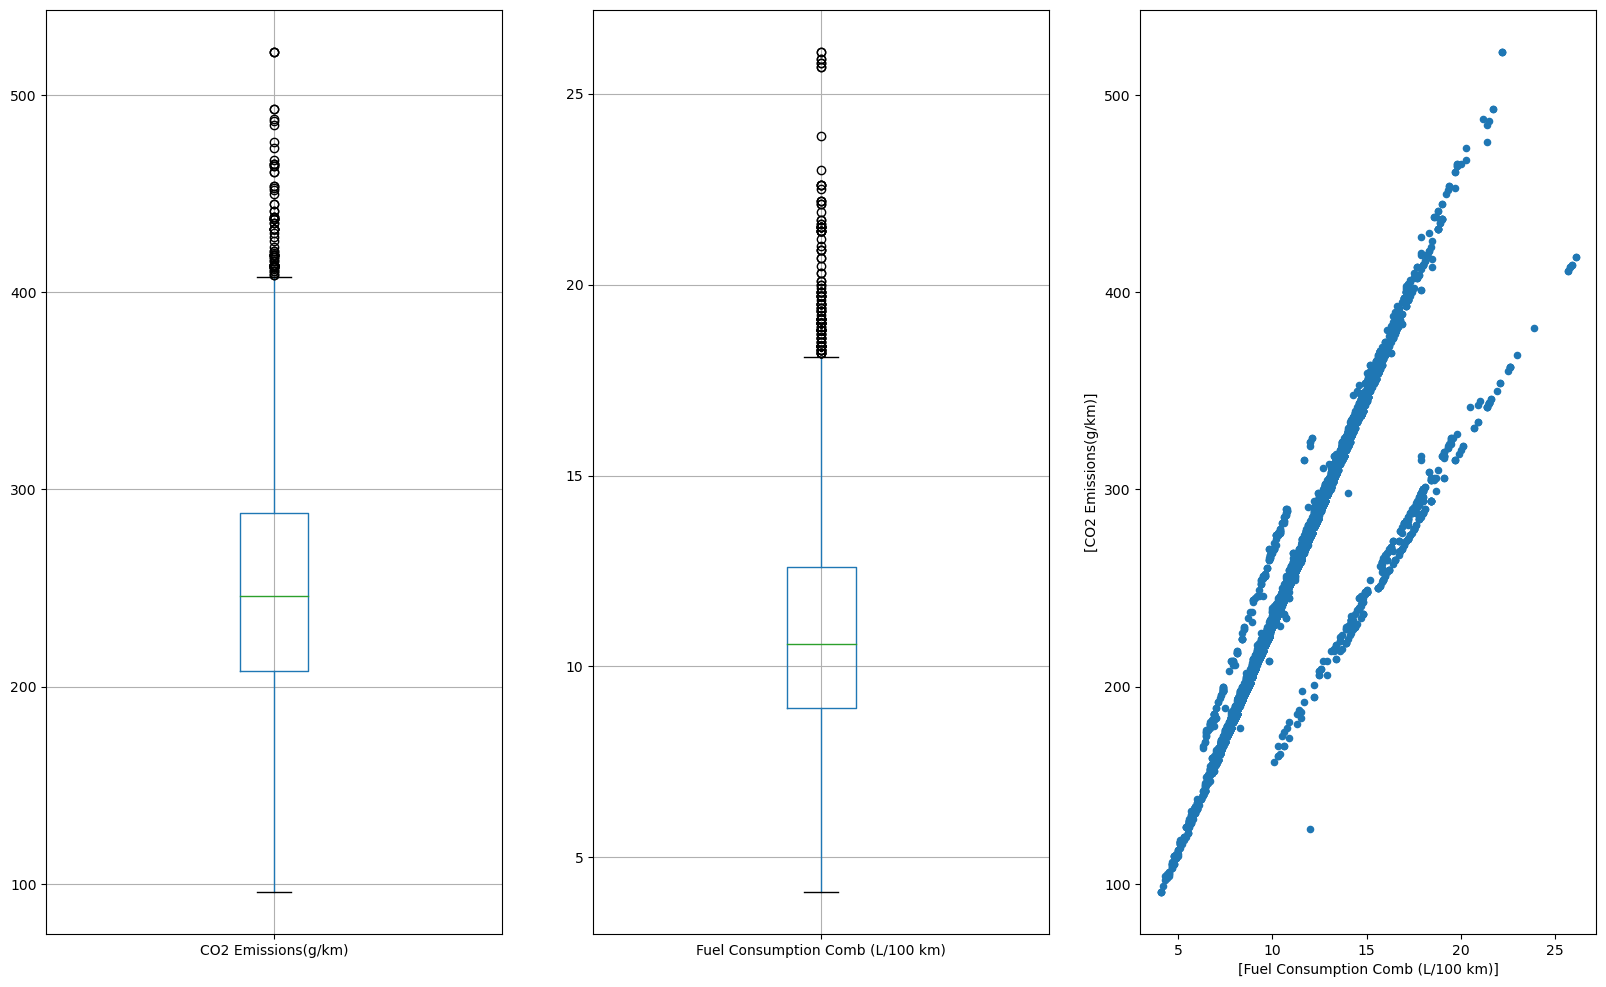

In [57]:
fig, (axs1,axs2,axs3) = plt.subplots(1,3,figsize=(20,12)) # set the size of the graph

df.boxplot(['CO2 Emissions(g/km)'], ax=axs1)
df.boxplot(['Fuel Consumption Comb (L/100 km)'], ax=axs2)
df.plot.scatter(['Fuel Consumption Comb (L/100 km)'],['CO2 Emissions(g/km)'],ax=axs3) # plotting fuel consumption combined vs CO2 emissions

## Creating Artificial Anomalies

As we can see from the plots above, the data is distributed fairly uniformly, with the exception of a couple outliers. These outliers, however, can be justified as being vehicles which are made by manufacturers that cater to the high-performance/luxury sports car market such as Bugatti and Lamborghini. These cars will focus more on the performance of their cars rather than the efficiency thus we accept these anomalies.

Now then, since our dataset does not have any outliers that cannot be justified, we must create them! First we will create some missing values. To do so we randomly select and delete the data in 10% of entries from both the 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions(g/km)' columns. Next, we will randomly generate some outliers by randomly selecting data and multiplying it by a random integer between 3 and 5 in the 'CO2 Emissions' column and a random integer between 5 and 7 in the 'Fuel Consumption Comb (L/100 km)' column. The reasoning for these ranges is that it creates noticeable outliers without being so outlandish that the graphs become unreadable. Since we are allowing some "outliers" if they are explained as simply being due to different features and focus of high-performance car manufacturers, we will say that these artificial outliers that we are creating come from human error and faulty measuring equipment. For example, perhaps the person measuring the fuel before and after fuel consumption testing made a mistake, or that one of the CO2 emissions measuring device was not calibrated correctly and created bad data when used throughout the testing.

In [58]:

"""deletes a random 10% of 'Fuel Consumption Comb (L/100 km) and 'CO2 Emissions(g/km) columns"""
rowsDeleteEmissions = [] # Store the rows we already did so we don't have repeated skewing
rowsDeleteFuel = [] # Store the rows we already did so we don't have repeated skewing
countEmissions = 0
countFuel =0

while countEmissions < int(df.shape[0]*.10):
    countEmissions +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsDeleteEmissions:
        continue
    else:
        df.at[row, 'CO2 Emissions(g/km)'] = None
        rowsDeleteEmissions.append(row)


while countFuel< int(df.shape[0]*.10):
    countFuel +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsDeleteFuel:
        continue
    else:
        df.at[row, 'Fuel Consumption Comb (L/100 km)'] = None
        rowsDeleteFuel.append(row)



"""deletes a random 3% of 'Fuel Consumption Comb (L/100 km) and 'CO2 Emissions(g/km) columns"""
rowsOutlierEmissions = [] # Store the rows we already did so we don't have repeated skewing
rowsOutlierFuel = [] # Store the rows we already did so we don't have repeated skewing

countOutlierEmissions=0
countOutlierFuel=0

while countOutlierEmissions < int(df.shape[0]*.03):
    countOutlierEmissions +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsOutlierEmissions:
        continue
    else:
        df.at[row, 'CO2 Emissions(g/km)'] *= r.randint(3,5)
        rowsOutlierEmissions.append(row)

while countOutlierFuel < int(df.shape[0]*.03):
    countOutlierFuel +=1
    row = r.randint(0,df.shape[0]-1)

    if row in rowsOutlierFuel:
        continue
    else:
        df.at[row, 'Fuel Consumption Comb (L/100 km)'] *= r.randint(5,7)
        rowsOutlierFuel.append(row)

Now that we have created some anomalies, lets re-run our tests to confirm. First we will check the some statistics with Pandas describe().

In [59]:
statisticsSkewed = df.describe()[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']] # generating some basic statistics about the dataset using pandas dataframe describe method
display(statisticsSkewed)

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,6676.000000,6681.000000
mean,12.556534,9.041706,12.608238,272.036521
std,3.500274,2.224456,10.339593,143.105335
min,4.200000,4.000000,4.100000,96.000000
25%,10.100000,7.500000,9.000000,209.000000
50%,12.100000,8.700000,10.700000,248.000000
75%,14.600000,10.200000,12.800000,293.000000
max,30.600000,20.600000,120.400000,2040.000000


As we can see, the mean is much less reasonable, as for both 'Fuel Consumption Comb (L/100 km)' and 'CO2 Emissions (g/km)' it much smaller than what we would expect if the data was distributed nicely. Likewise, the standard devation of the two columns with skewed data are much larger than we might expect. Next, lets recreate the scatter plot from above and create a boxplot of each of the two columns with outliers.

<AxesSubplot:xlabel='[Fuel Consumption Comb (L/100 km)]', ylabel='[CO2 Emissions(g/km)]'>

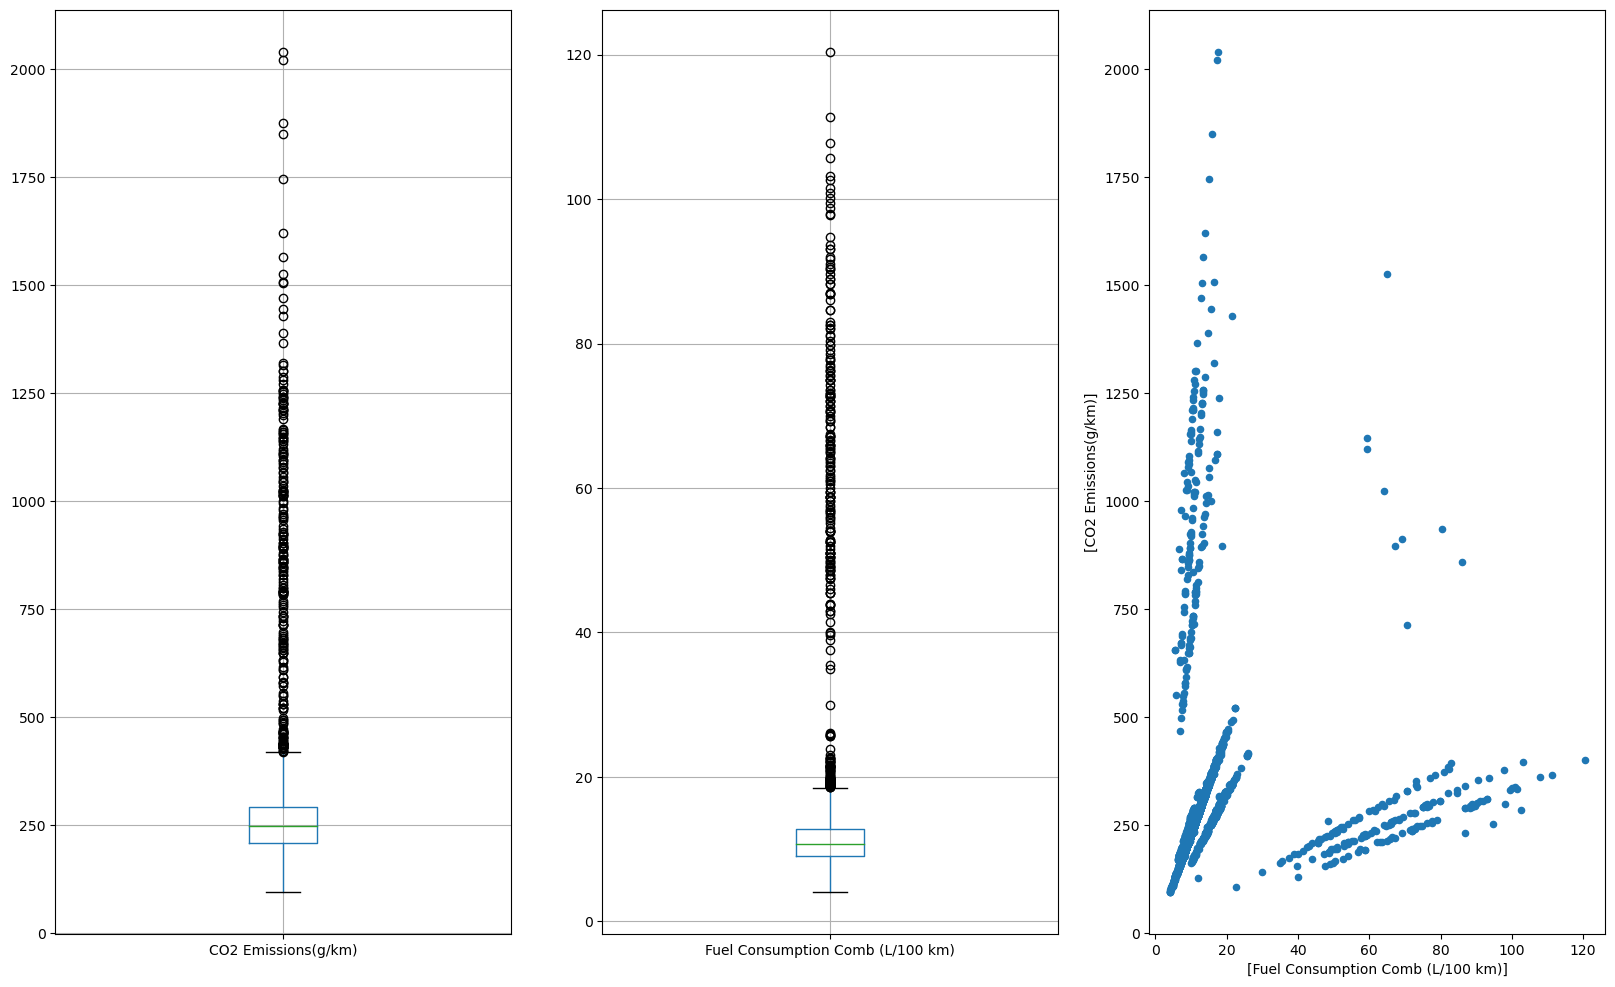

In [60]:
fig, (axs1,axs2,axs3) = plt.subplots(1,3,figsize=(20,12)) # set the size of the graph

df.boxplot(['CO2 Emissions(g/km)'], ax=axs1)
df.boxplot(['Fuel Consumption Comb (L/100 km)'], ax=axs2)
df.plot.scatter(['Fuel Consumption Comb (L/100 km)'],['CO2 Emissions(g/km)'],ax=axs3) # plotting fuel consumption combined vs CO2 emissions

## Cleaning the Data

As expected, there are now some outliers, although the outliers are arranged in a somewhat uniform fashion, this is explained as the faulty measuring equipment being off by a consistent amount throughout the years of testing.

Since we have created a skewed dataset, it is time to show that we know how to deal with the anomalies. We begin by removing all rows that contain a missing value with Pandas dropna() function. Because this data does not seem to have a normal distribution, it may be best that we ignore methods of removing outliers such as z-score or standard deviations. Viewing the box plots, we see that almost all of the outliers are outside of the upper-quartile. We might be tempted to remove everything outside the upper quartile, however, we know there were already some explainable phenomena that were outside of this range to begin with from the super car industry. To reduce the amount of useful data loss, we may want to push that range up to say the 90%. 

In [61]:
df = df.dropna() # drop rows with at least 1 NaN cell



lowQFuel = df['Fuel Consumption Comb (L/100 km)'].quantile(0.10) # get the lower quantile for the fuel consumption comb column
upperQFuel = df['Fuel Consumption Comb (L/100 km)'].quantile(0.90) # get the upper quantile for the fuel consumption comb column

lowQEmiss = df['CO2 Emissions(g/km)'].quantile(0.10) # get the lower quantile for the CO2 emissions
upperQEmiss = df['CO2 Emissions(g/km)'].quantile(0.90) # get the upper quantile for the fuel CO2 emissions


IQRFuel = upperQFuel-lowQFuel # Get the interquantile range for the fuel consumption comb column
IQREmiss = upperQEmiss-lowQEmiss # Get the interquantile range for the CO2 emissions column

lowFenceFuel = lowQFuel-1.5*IQRFuel  # Get the lower fence for the fuel consumption comb column
highFenceFuel = upperQFuel+1.5*IQRFuel # Get the upper fence for the fuel consumption comb column

lowFenceEmiss = lowQEmiss-1.5*IQREmiss  # Get the lower fence for the fuel CO2 emissions column
highFenceEmiss = upperQEmiss+1.5*IQREmiss # Get the upper fence for the fuel CO2 emissions column

df = df.loc[(df['Fuel Consumption Comb (L/100 km)'] > lowFenceFuel) & (df['Fuel Consumption Comb (L/100 km)'] < highFenceFuel)] # remove the rows with datapoints outside the IQR for fuel consumption column
df = df.loc[(df['CO2 Emissions(g/km)'] > lowFenceEmiss) & (df['CO2 Emissions(g/km)'] < highFenceEmiss)] # remove the rows with datapoints outside the IQR for fCO2 emissions column


display(df)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196.0
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230.0
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232.0
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255.0
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220.0
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0


Let's run statistics and graph the results after cleaning:

In [62]:
statisticsCleaned = df.describe()[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']] # generating some basic statistics about the dataset using pandas dataframe describe method
display(statisticsCleaned)

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,5684.000000,5684.000000,5684.000000,5684.000000
mean,12.523047,9.026108,10.952938,250.698276
std,3.499371,2.228977,2.897162,59.729968
min,4.200000,4.000000,4.100000,96.000000
25%,10.000000,7.475000,8.900000,207.000000
50%,12.100000,8.700000,10.600000,246.000000
75%,14.500000,10.200000,12.600000,288.000000
max,30.600000,20.600000,26.100000,573.000000


<AxesSubplot:xlabel='[Fuel Consumption Comb (L/100 km)]', ylabel='[CO2 Emissions(g/km)]'>

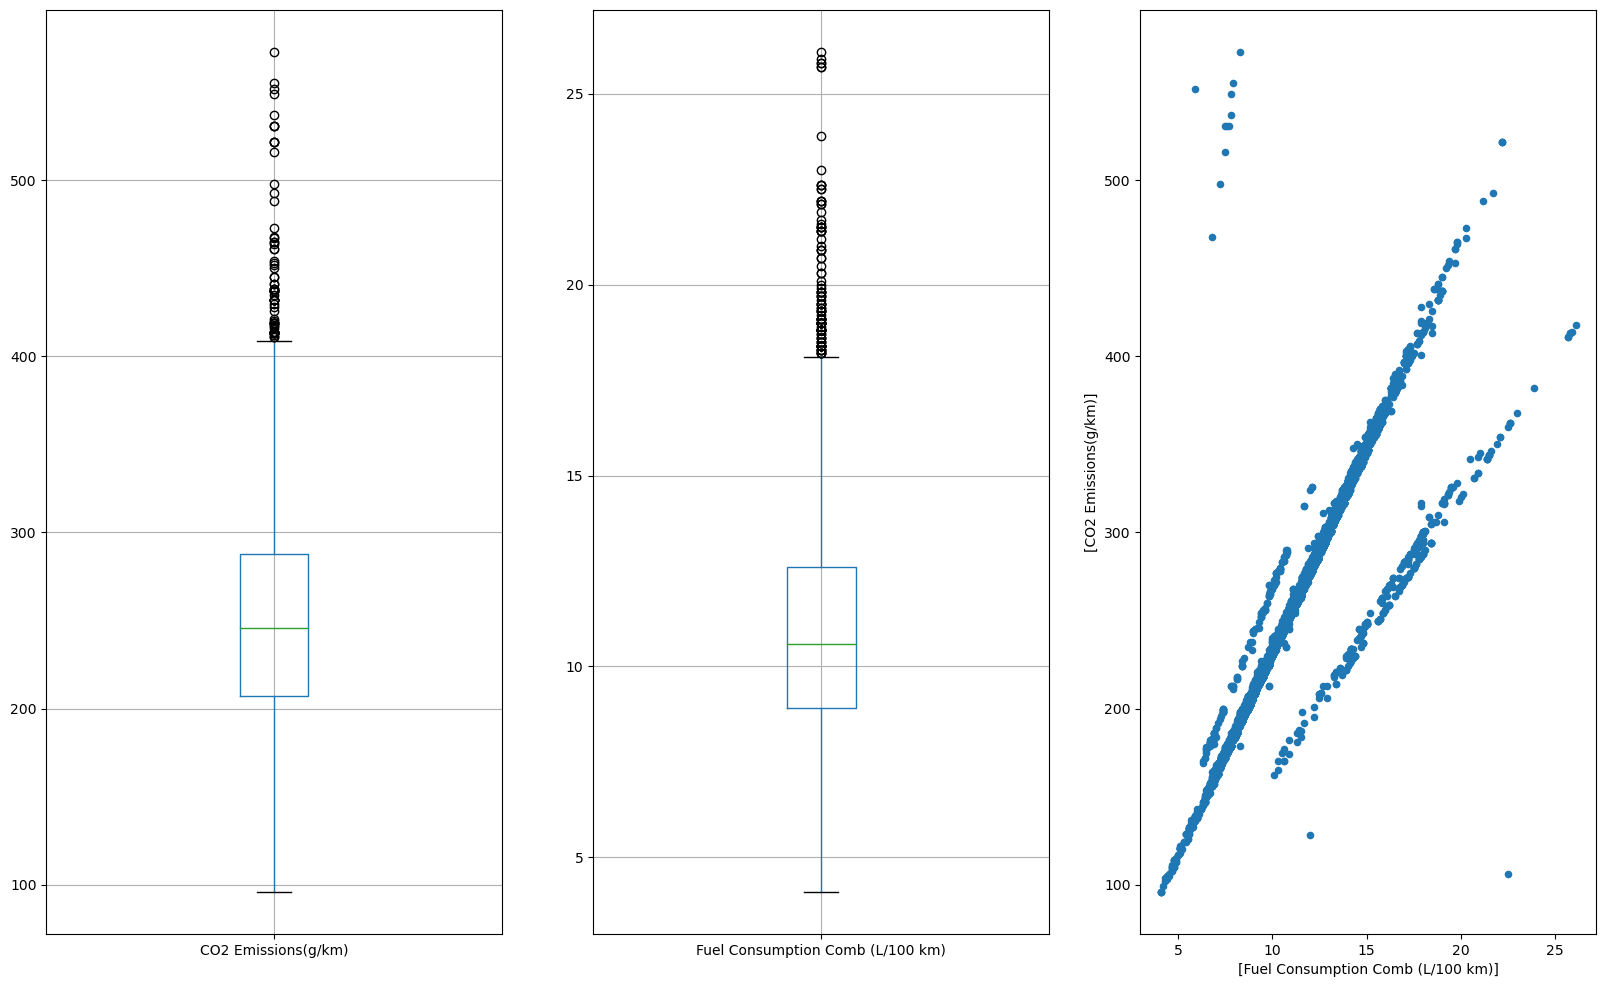

In [63]:
fig, (axs1,axs2,axs3) = plt.subplots(1,3,figsize=(20,12)) # set the size of the graph

df.boxplot(['CO2 Emissions(g/km)'], ax=axs1)
df.boxplot(['Fuel Consumption Comb (L/100 km)'], ax=axs2)
df.plot.scatter(['Fuel Consumption Comb (L/100 km)'],['CO2 Emissions(g/km)'],ax=axs3) # plotting fuel consumption combined vs CO2 emissions

Referring to our cleaned statistics and a quick visual diagnosis of the plots, we see we have cleaned the data while keeping some of the acceptable "outlier" datapoints such as those from the super car companies. Doing so we removed about 1600 rows of data from out original 7385, which is approximately 23% of our original dataset, exactly as intended.